#### 06 사이킷런으로 수행하는 타이타닉 생존자 예측

* Passengerid: 탑승자 데이터 일련번호
* Survived: 생존 여부, 0=사망, 1=생존
* pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex : 탑승자 성별
* name : 탑승자 이름
* Age : 탑승자 나이
* sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
* parch : 같이 탑승한 부모님 또는 어린이 인원수
* ticket : 티켓 번호
* fare : 요금
* cabin : 선실 번호
* embarked : 중간 정착 항구 C=Cherbourg, Q = Queenstown, S = Southampton

In [2]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp311-cp311-win_amd64.whl (1.9 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
     ---------------------------------------- 2.5/2.5 MB 22.8 MB/s eta 0:00:00
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd C:\Users\jongw\OneDrive\바탕 화면\포트폴리오\파이썬 머신러닝 완벽가이드\06_titanic

C:\Users\jongw\OneDrive\바탕 화면\포트폴리오\파이썬 머신러닝 완벽가이드\06_titanic


In [3]:
titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex는 DataFrame 인덱스의 범위를 나타내므로 전체 로우 수를 알 수 있다.\
RangeIndex가 891entries이므로 891개의 로우로 구성된다. 그리고 칼럼 수는 12개이다.\
2개의 칼럼이 float64 타입, 5개의 칼럼이 int64 타입, 5개의 칼럼이 object 타입이다.\
판다스의 object 타입은 string 타입으로 봐도 무방하다. 판다스는 넘파이 기반으로 만들어졌고 넘파이의 String 타입이 길이 제한이 있어서\
이에 대한 구분을 위해 object 타입으로 명기한 것이다. Age, Cabin, Embarked 칼럼은 각각 714개, 204개, 889개의 Not Null 값을 가지고 있으므로\
각각 177개, 608개, 2개의 Null값(NaN)을 가지고 있다.

사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 한다. 여기서는 DataFrame의 fillna() 함수를 사용해\
간단하게 Null 값을 평균 또는 고정 값으로 변경한다. Age의 경우는 평균 나이, 나머지 칼럼은 'N'값으로 변경한다. 그다음, 모든 칼럼의 Null 값이 없는지 다시 확인한다.

In [5]:
print(' Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Sex, Embarked 값은 별 문제가 없으나, Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않았다\
'C23, C25, C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin값이 4건이 된다. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요.\
왜냐하면 이 시절에는 지금보다 부자와 가난한 사람에 대한 차별이 더 있었던 시절, 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것이다.\
Cabin 속성의 경우 앞 문자만 추출

In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    NaN
1      C
2    NaN
Name: Cabin, dtype: object


성별에 따른 생존자 수 비교

In [7]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survived 0은 사망, 1은 생존.\
탑승객은 남자가 577명,
여자가 314명으로 남자가 더 많다

NameError: name 'barplot' is not defined

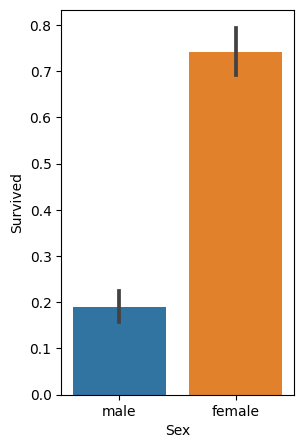

In [8]:
plt.figure(figsize=(3, 5))
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)
for bar in barplot.patches:
    bar.set_width(0.3)
plt.show()

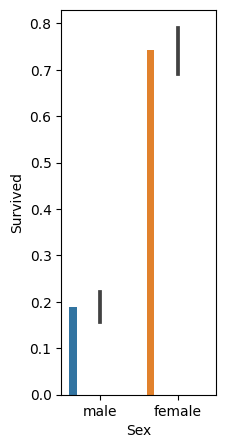

In [9]:
# 데이터를 그리기 전에 figure를 설정합니다.
plt.figure(figsize=(2, 5))

# seaborn의 barplot 함수를 이용해 그래프를 그립니다.
# 반환되는 객체를 barplot이라는 변수에 저장합니다.
barplot = sns.barplot(x='Sex', y='Survived', data=titanic_df)

# 각 막대에 대해, 막대의 너비를 조절합니다.
for bar in barplot.patches:
    bar.set_width(0.1)  # 이 값은 막대의 너비를 설정합니다. 이 값을 조절하여 원하는 너비로 설정하실 수 있습니다.

plt.show()  # 그래프를 화면에 표시합니다.


시각화 : 그래프의 시각적 만족도를 높이기 위해 그래프의 figsize를 조절하면서 막대그래프의 사이즈도 함께 조절하려고 했으나 barplot의 가운데 눈금과 맞지 않는 현상이 발생했다.\
GPT가 Seaborn은 그래프 막대의 가운데정렬이 안된다고 한다.

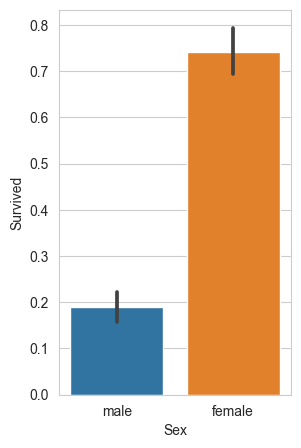

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(3, 5))
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)
plt.show()

#### 객실 등급 별 생존확률

<Axes: xlabel='Pclass', ylabel='Survived'>

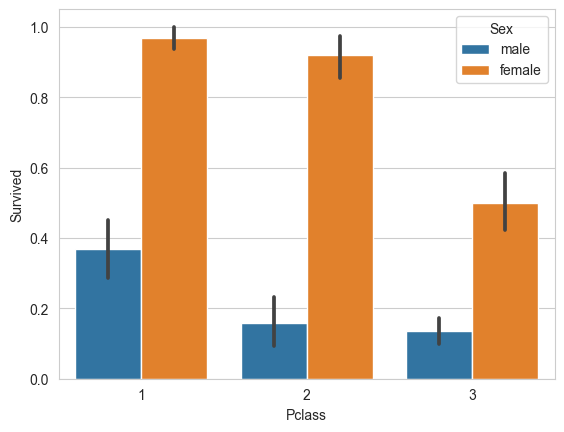

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

여성의 경우 1, 2등실에 따른 생존확률 차이는 크지 않으나, 3등실의 경우 생존 확률이 상대적으로 많이 떨어진다.\
남성의 경우는 일등실의 생존 확률이 2, 3등실의 생존 확률보다 월등히 높다.\

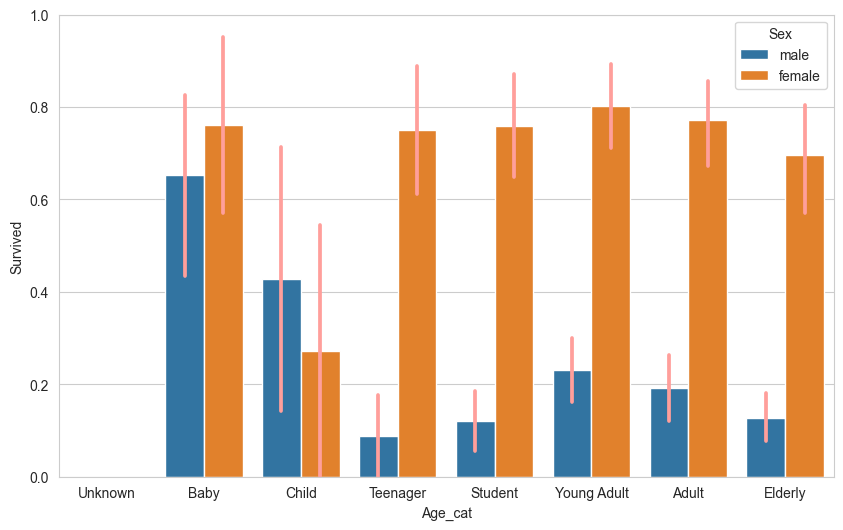

In [12]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure 수정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력 값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

pastel1 = sns.color_palette("pastel")[3]

sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data = titanic_df, order = group_names, errcolor=pastel1)
titanic_df.drop('Age_cat', axis = 1, inplace=True)

Seaborn의 barplot 함수에서 막대그래프 가운데 들어가 있는 선은 에러바로, 각 막대의 불확실성을 표시합니다.\
 이 선의 색상은 errcolor 매개변수를 사용해 변경할 수 있습니다.

 
 pastel1 = sns.color_palette("pastel")[3]

sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data = titanic_df, order = group_names, errcolor=pastel1)

LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수 -1)까지의 숫자 값으로 변환\
사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프로임워크 API인 fit(), transform()으로 데이터를 변환한다.\
여러 칼럼을 encode_features()함수를 새로 생성해 한번에 변환하도록 한다.

In [13]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature]) 
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


Sex, Cabin, Embarked 속성이 숫자형으로 바뀌었다.

In [14]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace=True)
    return df   

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

#레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [15]:
import os

In [15]:
os.getcwd()

'C:\\Users\\jongw\\OneDrive\\바탕 화면\\포트폴리오\\파이썬 머신러닝 완벽가이드\\06_titanic'

In [16]:
titanic_df = pd.read_csv(r'C:\Users\jongw\OneDrive\바탕 화면\포트폴리오\파이썬 머신러닝 완벽가이드\06_titanic\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

내려받은 학습 데이터 세트를 기반으로 해서 train_test_split() API를 이용해 별도의 테스트 데이터 세트를 추출.\
테스트 데이터 세트 크기는 전체의 20%로 한다.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

ML 알고리즘인 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해 타이타닉 생존자를 예측해 본다.\
LogisticRegression의 생성 인자로 입력된 solver = 'liblinear'는 로지스틱 회귀의 최적화 알고리즘을 libinear로 설정하는 것이다.\
일반적으로 작은 데이터 세트에서의 이진 분류는 liblinear가 성능이 약간 더 좋은 경향이 있다.


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회구를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있다.\
아직 최적화 작업을 수행하지 않았고, 데이터양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다.\
다음으로는 교차 검증으로 결정 트리 모델을 좀 더 평가해 본다.\
앞에서 언급한 교차 검증을 사이킷런 model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용한다\
먼저 사이킷런의 KFold 클래스를 이용해 교차 검증을 수행하며, 폴드 개수는 5개로 설정한다.

In [19]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 에측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    #KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    #5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

In [21]:
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


cross_val_score()와 K 폴드 평균 정확도가 약간 다른데, 이는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.\
GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정.\
CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_sample_split, min_sample_leaf를 변경하면서 성능을 측정한다.\
최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로\
분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


최적화된 하이퍼 파라미터인 max_depth = 3, min_samples_leaf = 5, min_samples_split = 2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상\
하이퍼 파라미터 변경 전보다 약 8%이상이 증가했는데, 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기 매우 어렵다. 테스트용 데이터 세트가 작기 때문에\
수치상으로 예측 성능이 많이 증가한 것처럼 보인다

머신러닝은 데이터 가공/변환, 모델학습/예측, 평가의 프로세스로 구성\
회귀의 경우 실제값과 예측값의 오차 평균값에 기반, 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 \
평균 오차를 구하는 방법과 같이 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형이다.

분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반, \
단순히 이러한 정확도만 가지고 판단했는가는 잘못된 평가 결과에 빠질 수 있다.

분류의 성능 평가 지표

* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)
* 정밀도(Precision)
* 재현율(Recall)
* F1 스코어
* ROC AUC

분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진 분류와 여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있다.

#### 01 정확도(Accuracy)

정확도(Accuracy) = 예측 결과가 동일한 데이터 건수/전체 예측 데이터 건수

정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다. \
하지만 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

In [23]:
os.getcwd()

'C:\\Users\\jongw\\OneDrive\\바탕 화면\\포트폴리오\\파이썬 머신러닝 완벽가이드\\06_titanic'

In [24]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else : 
                pred[i] = 1
                
        return pred

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv(r'C:\Users\jongw\OneDrive\바탕 화면\포트폴리오\파이썬 머신러닝 완벽가이드\06_titanic\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

#위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.787709


정확도는 불균형한(imbalanced)레이블 값 분포에서 ML모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.\
예를 들어 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 된다.\

Mnist 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에 정확도 지표 적용 시 발생할 수 있는 문제

MNIST 데이터 세트는 0~9까지 숫자 이미지의 픽셀 정보를 가지고 이씅며, 이를 기반으로 숫자 Digit를 예측하는데 사용.\
사이킷런은 load_digits()API를 통해 MNIST

In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digit
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)


In [27]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 :{:3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 :0.900000


#### 02 오차 행렬

오차행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused)있는지 함께 보여주는 지표이다. \
이진 분류의 예측 오류가 얼마인지와 더불어 어떤 유형의 예측 오류가 발생하는지 나타내는 지표이다. 

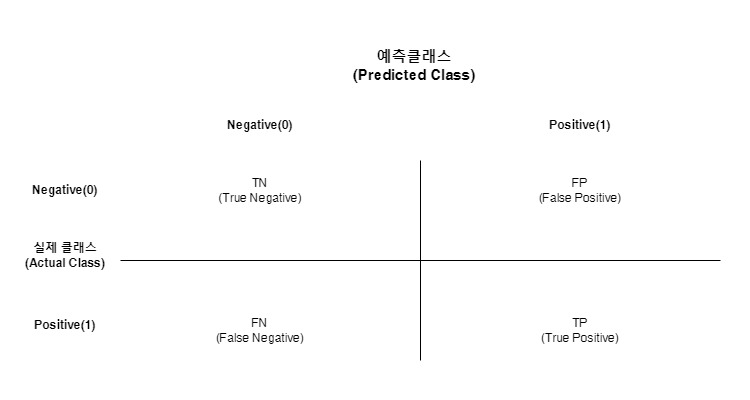

TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값(값 1)과 Negative 결정 값(값 0)의 결합에 따라 결정된다.\
TN은 True Negative의 의미이며 True는 예측 클래스 값과 실제 클래스 값이 같다는 의미고 뒤의 Negative는 예측값이 Negative 값이라는 의미이다.\
즉 TN은 예측을 Negative 값 0으로 예측했는데, 실제 값도 Negative 값 0이라는 의미이다. TN, FP, FN, TP 기호가 의미하는 것은 앞 문자 True/False는 예측값과 실제값이\
'같은가/틀린가'를 의미한다. Negative/Positive는 예측 결과 값이 부정(0)/긍정(1)을 의미한다.

* TN는 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

출력된 오차 행렬은 ndarray 형태, 이진 분류의 TN, FP, FN, FP는 위 도표와 동일한 위치를 가지고 array에서 가져올 수 있다.\
TN은 array[0, 0]로 405, FP는 array[0,1]로, 0, FN은 array[1, 0]로 45, TP는 array[1, 1]로 0에 해당한다.\
앞 절의 MyFakeClassifier는 load_digits()에서 target == 7인지 아닌지에 따라 클래스 값을 True/False 이진 분류로 변경한 데이터 세트를 사용해 \
무조건 Negative로 예측하는 Classifier였고 테스트 ㅓ데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건이다.

정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP)/(TN + FP + FN + TP)

불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다.\
10,000건의 데이터 세트에서 9,900건이 Negative이고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아진다.\
또 Negative로 예측할 때 정확도가 높기 때문에 FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positive로 예측하는 경우가 작기 때문에 FP역시 매우 작아진다.\
결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는\
수치적인 판단 오류를 일으키게 된다. 

정확도는 분류(Classification) 모델의 성능을 측정할 수 있는 한 가지 요소일 뿐이다. \
불균형한 데이터 세트에서 정확도만으로는 모델 신뢰도가 떨어질 수 있다.

#### 03 정밀도와 재현율

정밀도 = TP / (FP + TP) \
재현율 = TP / (FN + TP)

정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율\
공식의 분모인 FP + TP는 예측을 Positive로 한 모든 데이터 건수이며, 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다.\
Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고 불린다.

재현율은 실제 값이 Positive인 대상 중, 예측과 실제 값이 Positive로 일치한 데이터의 비율\
공식의 분모인 FN + TP는 실제 값이 Positive인 모든 데이터 건수이며, 공식의 분자인 TP는 예측과 실제 값이 Positive로
일치한 데이터 건수이다.\
민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불린다.

정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있다.\
재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다.\
암 판단 모델은 재현율이 훨씬 중요한 지표이다.\
보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요하다.\
보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만, 정밀도가 더 중요한 지표인 경우도 있다.\
스팸메일 여부를 판단하는 모델의 경우 실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, \
실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우, 메일을 아에 받지 못하게 돼 업무에 차질이 생긴다.

* 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
* 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춘다.\
이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다. 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다. \
반면 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않다.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [33]:
os.getcwd()

'C:\\Users\\jongw\\OneDrive\\바탕 화면\\포트폴리오\\파이썬 머신러닝 완벽가이드\\06_titanic'

In [36]:
import time
start_time = time.time()


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


end_time = time.time()
print("time:", end_time - start_time)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
time: 0.033942461013793945


#### 정밀도/재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.\
하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.\
이를 정밀도/재현율의 트레이드(Trade-off)라고 부른다.\
사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다.\
예측 확률이 큰 레이블값으로 예측하게 된다.
예를들어 이진분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측됐다면 최종 예측은 더 큰 확률을 가진, 90% 확률을 가진 1로 예측한다.\
이진 분류에서는 임곗값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정한다.\
사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공한다. predict_proba() 메서드는 학습이 완료된 사이킷런 Classifier 객체에서\
호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.\
predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과이다.


In [37]:
pred_proba = lr_clf.predict_log_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[-0.79994813 -0.59666   ]
 [-0.14692917 -1.99036986]
 [-0.14583946 -1.99728253]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[-0.79994813 -0.59666     1.        ]
 [-0.14692917 -1.99036986  0.        ]
 [-0.14583946 -1.99728253  0.        ]]


In [38]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [39]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binaraizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[118   0]
 [ 61   0]]
정확도: 0.6592, 정밀도: 0.0000, 재현율: 0.0000


c:\Users\jongw\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[118   0]
 [ 61   0]]
정확도: 0.6592, 정밀도: 0.0000, 재현율: 0.0000


c:\Users\jongw\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\jongw\\OneDrive\\바탕 화면\\포트폴리오\\파이썬 머신러닝 완벽가이드\\06_titanic'